# Overview

Mental health significantly impacts society and individuals, affecting well-being, work performance, and relationships. Estimates suggest that millions worldwide experience mental health issues annually, with conditions like major depression affecting 1 in 3 women and 1 in 5 men over their lifetimes. Despite its prevalence, mental health conditions often go untreated due to stigma and inadequate access to quality care.

Therefore, this project proposes the development of a deep learning model to predict an individual's susceptibility to experiencing difficulties in coping with mental health challenges. 

The following data is a collection of medical and demographic data from patients, along with their mood (*Low, Medium, High*). This dataset includes 292,364 rows and 17 columns:

1. Timestamp
2. Gender
3. Country
4. Occupation
5. self_employed
6. family_history
7. treatment
8. Days_Indoors
9. Growing_Stress
10. Changes_Habits
11. Mental_Health_History
12. Mood_Swings
13. Coping_Struggles
14. Work_Interest
15. Social_Weakness
16. mental_health_interview
17. care_options

From this analysis, healthcare professionals and researchers may find a resource in identifying patients at risk and developing early intervention plans.

## Libraries

In [1]:
# Import libraries for numerical computations
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for feature validation
from scipy.stats import chi2_contingency

# Import libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Import libraries for model evaluation
from sklearn.metrics import (accuracy_score,f1_score,recall_score,roc_curve,roc_auc_score,cohen_kappa_score,classification_report,precision_score,confusion_matrix)

# Import libraries for machine learning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [2]:
df = pd.read_csv(r'/Users/chetan/Desktop/DSE Projects/Mental Health Case Study/Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
df.shape

(292364, 17)

# EDA - Cleaning
1. Understand variables
2. Clean dataset (missing data, redundant data, outliers)

### 1. Gather Information About the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [5]:
df.describe().T

,count,unique,top,freq
Timestamp,292364,580,8/27/2014 11:43,2384
Gender,292364,2,Male,239850
Country,292364,35,United States,171308
Occupation,292364,5,Housewife,66351
self_employed,287162,2,No,257994
family_history,292364,2,No,176832
treatment,292364,2,Yes,147606
Days_Indoors,292364,5,1-14 days,63548
Growing_Stress,292364,3,Maybe,99985
Changes_Habits,292364,3,Yes,109523


### 2a) Check Missing Variables

In [6]:
print('Percentage of Missing Values')
(df.isna().mean() * 100).round(1)

Percentage of Missing Values


Timestamp                  0.0
Gender                     0.0
Country                    0.0
Occupation                 0.0
self_employed              1.8
family_history             0.0
treatment                  0.0
Days_Indoors               0.0
Growing_Stress             0.0
Changes_Habits             0.0
Mental_Health_History      0.0
Mood_Swings                0.0
Coping_Struggles           0.0
Work_Interest              0.0
Social_Weakness            0.0
mental_health_interview    0.0
care_options               0.0
dtype: float64

In [7]:
df.dropna(inplace = True)

#### Since there is less than 2% missing data, dropping those rows should have minimal impact.

In [8]:
df.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

### 2b) Check for Duplicate Entries, Unnecessary Columns, and Data Formatting

In [9]:
# Print amount of duplicates
print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

# Print percentage of duplicates
print('Percentage of duplicates: {:.1%}'.format(df.duplicated().mean()))

Amount of duplicates: 2,304
Percentage of duplicates: 0.8%


In [10]:
df.drop_duplicates(inplace = True)

print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

Amount of duplicates: 0


#### Since there is less than 1% duplicate data, dropping those rows should have minimal impact.

In [11]:
# We are not going to use the Timestamp column in our analysis
df.drop(columns = "Timestamp", inplace = True)

### 2c) Check Outliers

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284858 entries, 3 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   284858 non-null  object
 1   Country                  284858 non-null  object
 2   Occupation               284858 non-null  object
 3   self_employed            284858 non-null  object
 4   family_history           284858 non-null  object
 5   treatment                284858 non-null  object
 6   Days_Indoors             284858 non-null  object
 7   Growing_Stress           284858 non-null  object
 8   Changes_Habits           284858 non-null  object
 9   Mental_Health_History    284858 non-null  object
 10  Mood_Swings              284858 non-null  object
 11  Coping_Struggles         284858 non-null  object
 12  Work_Interest            284858 non-null  object
 13  Social_Weakness          284858 non-null  object
 14  mental_health_interview  

#### Since most of the data are type object or datetime, we cannot remove outliers.

# EDA - Visualizations

In [13]:
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [14]:
def countsplot(category):
  """
  Creates a count plot and returns a DataFrame with counts and percentages.

  Args:
      category (str): The column name for the categorical variable to plot.

  Returns:
      pandas.DataFrame: A DataFrame containing counts and percentages for each category.
  """

  # Create count plot with dynamic title
  sns.countplot(data = df, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = df[category].value_counts()
  category_percentages = df[category].value_counts(normalize = True)

  # Combine counts and percentages into a DataFrame
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df

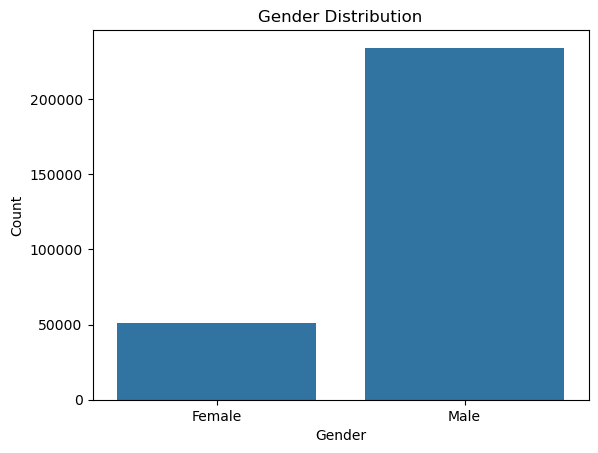

,Count,Proportion
Gender,,
Male,"234,000",82.1%
Female,"50,858",17.9%


In [15]:
countsplot("Gender")

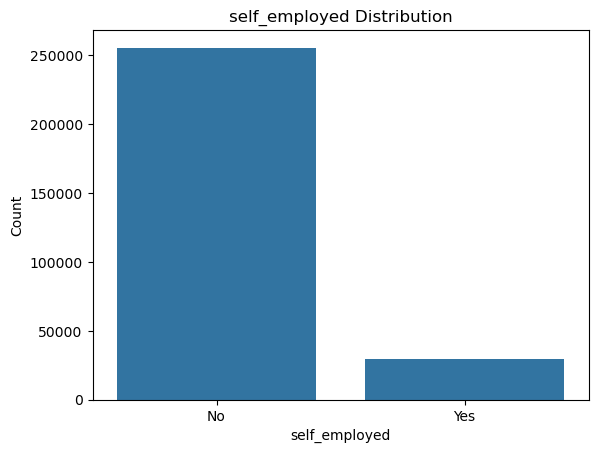

,Count,Proportion
self_employed,,
No,"255,711",89.8%
Yes,"29,147",10.2%


In [16]:
countsplot("self_employed")

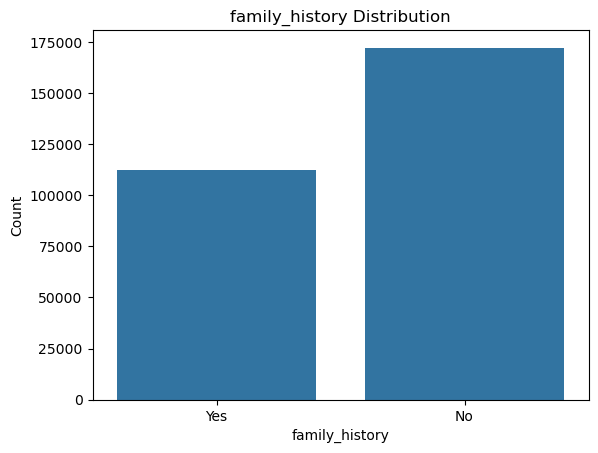

,Count,Proportion
family_history,,
No,"172,357",60.5%
Yes,"112,501",39.5%


In [17]:
countsplot("family_history")

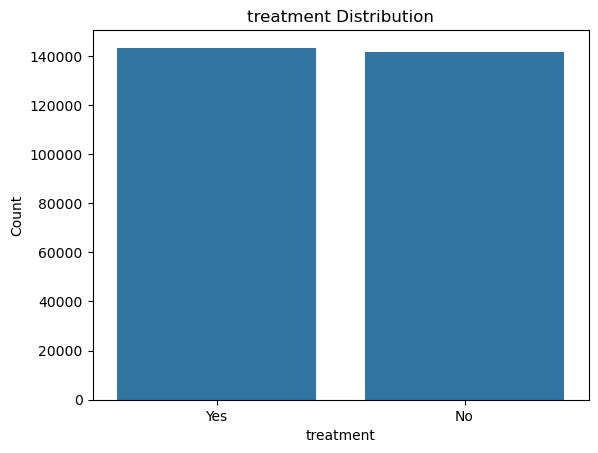

,Count,Proportion
treatment,,
Yes,"143,331",50.3%
No,"141,527",49.7%


In [18]:
countsplot("treatment")

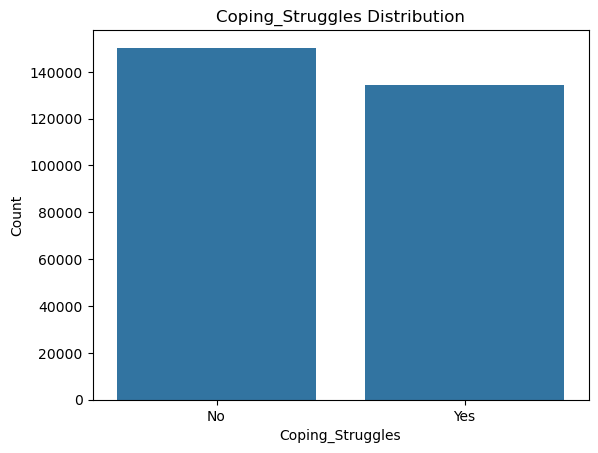

,Count,Proportion
Coping_Struggles,,
No,"150,318",52.8%
Yes,"134,540",47.2%


In [19]:
countsplot("Coping_Struggles")

In [20]:
def top_10_bar(category, x_rotation = 45):
    """
    Plots a bar plot showing the distribution of a categorical variable for the top 10 categories.

    Args:
        category (str): The column name for the categorical variable to plot.
        x_rotation (int, optional): The number of degrees to rotate the x-axis labels. Defaults to 45.
    """
    # Get the top 10 categories and their counts in a DataFrame
    top_10_df = df[category].value_counts().head(10).reset_index()

    # Plotting
    sns.barplot(data = top_10_df, x = category, y = "count")
    plt.title(category)
    plt.xticks(rotation = x_rotation)
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.show()

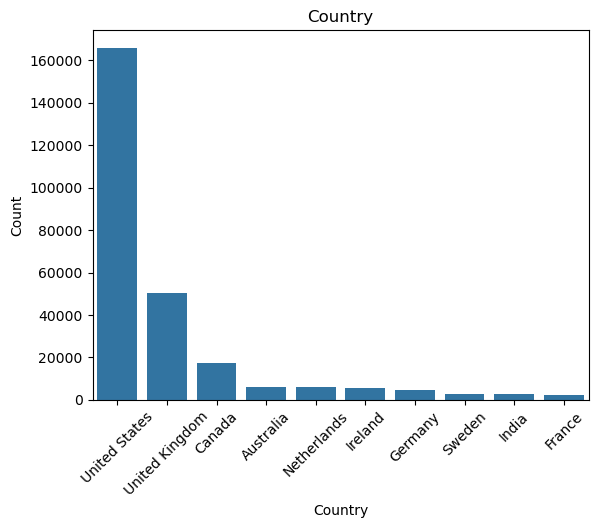

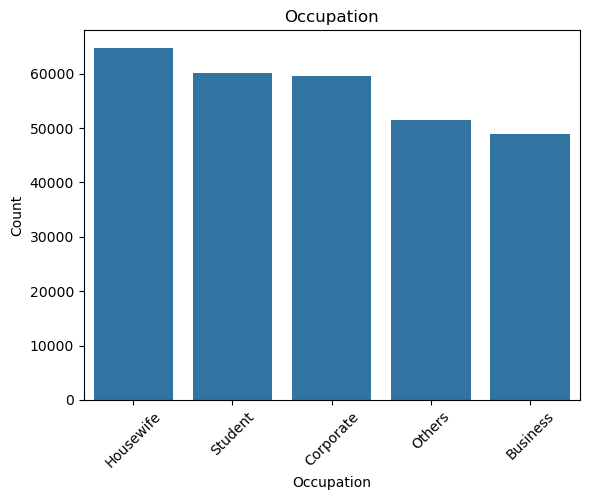

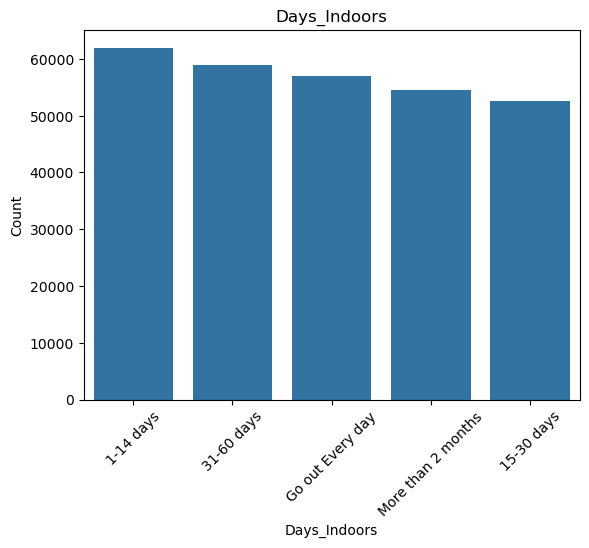

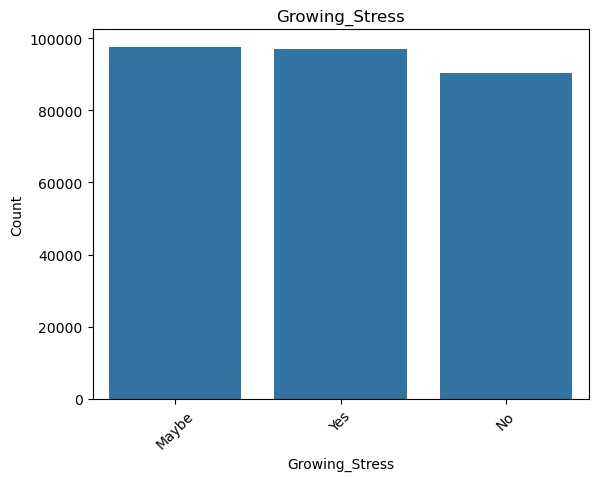

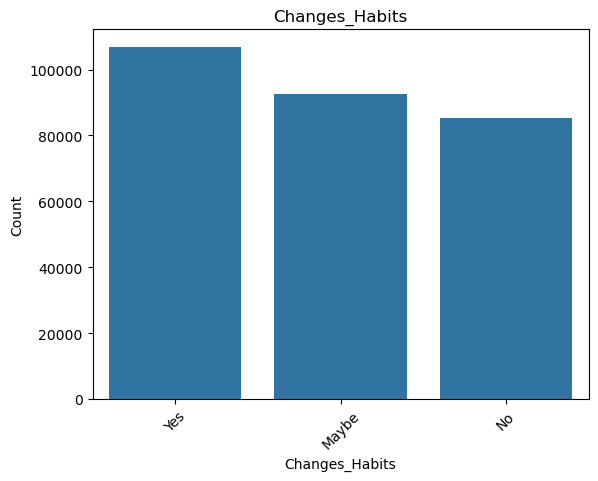

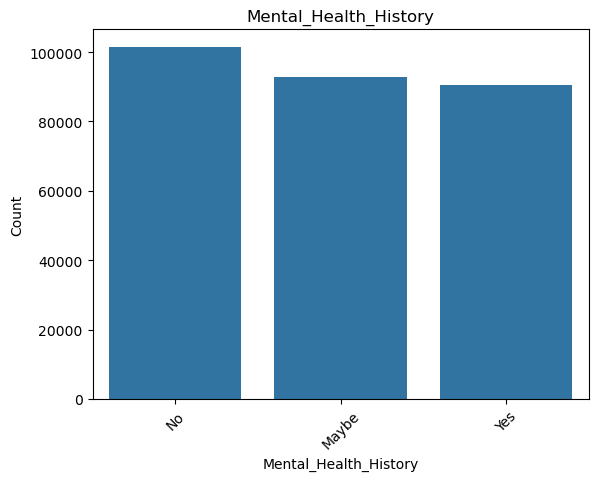

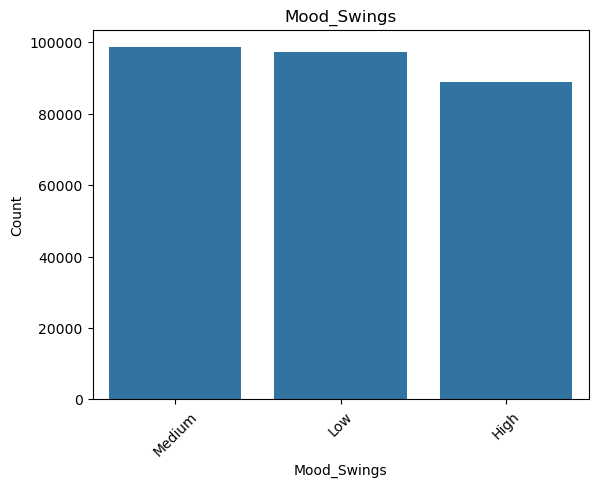

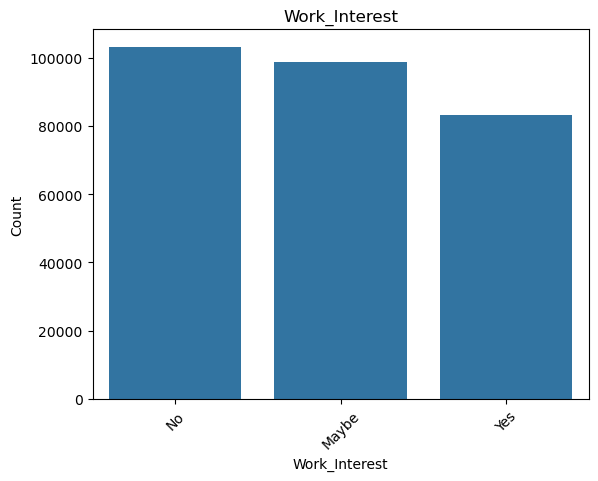

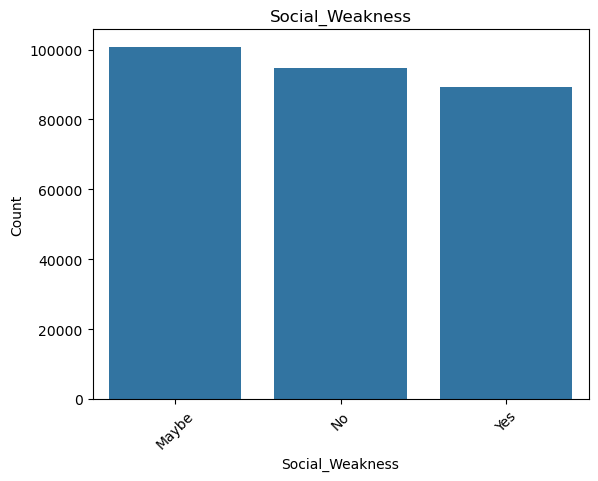

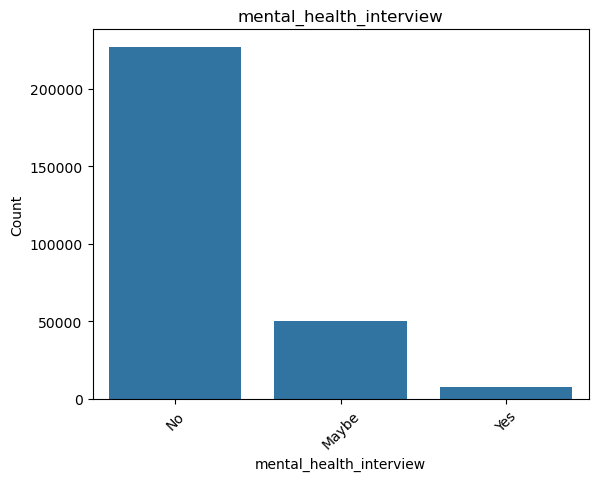

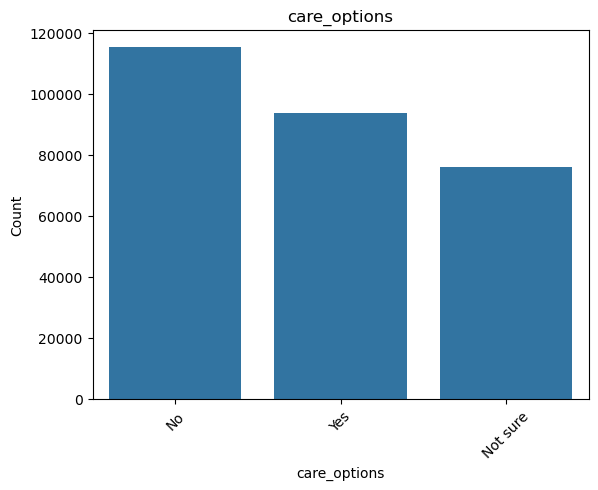

In [21]:
for column in df.columns:
    if df[column].nunique() > 2:
        top_10_bar(column)

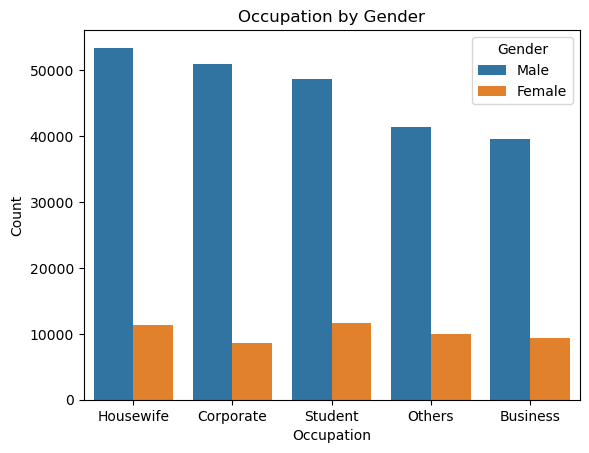

,Gender,Occupation,Count
5,Male,Housewife,53400
6,Male,Corporate,51000
7,Male,Student,48600
8,Male,Others,41400
9,Male,Business,39600
0,Female,Student,11564
1,Female,Housewife,11328
2,Female,Others,10030
3,Female,Business,9322
4,Female,Corporate,8614


In [22]:
# Group data by Gender then filter by Occupation and count occurrences
gender_data = (
    df
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
    .sort_values(by = "Count", ascending = False)
)

sns.barplot(data = gender_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Occupation by Gender")
plt.show()

gender_data

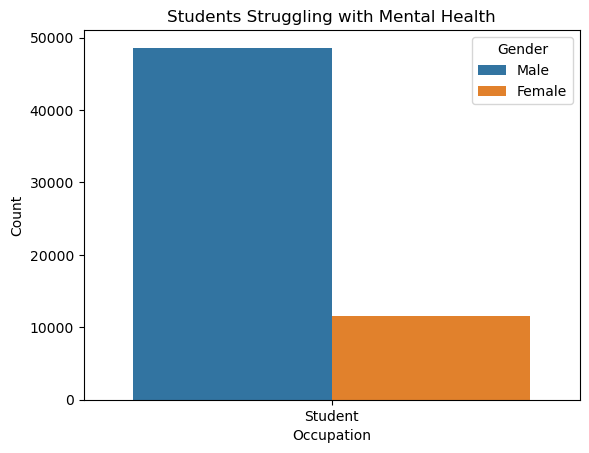

,Gender,Occupation,Count,Percentage
7,Male,Student,48600,80.8
0,Female,Student,11564,19.2


In [23]:
# Filter the gender data to include only entries where the occupation is "Student"
student_data = gender_data[gender_data["Occupation"] == "Student"]

sns.barplot(data = student_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Students Struggling with Mental Health")
plt.show()

# Get the total count
total_student_count = student_data["Count"].sum() 

# Calculate percentages based on gender counts
student_data["Percentage"] = (
    student_data["Gender"]
    .apply(
        lambda gender: round((student_data.loc[student_data["Gender"] == gender, "Count"].iloc[0] / total_student_count) * 100, 1)
    )
)

student_data

In [24]:
# Filter the DataFrame to include only United States students and count occurrences by gender
us_student_data = (
    df
    .loc[(df["Country"] == "United States") & (df["Occupation"] == "Student")]
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
)

# Get the total count
total_us_student_count = us_student_data["Count"].sum() 

# Calculate percentages based on gender counts
us_student_data["Percentage"] = (
    us_student_data["Gender"]
    .apply(
        lambda gender: round((us_student_data.loc[us_student_data["Gender"] == gender, "Count"].iloc[0] / total_us_student_count) * 100, 1)
    )
)

us_student_data

,Gender,Occupation,Count,Percentage
0,Female,Student,7742,22.0
1,Male,Student,27378,78.0


In [25]:
print(f"Out of {total_student_count:,} students around the world struggling with mental health, {total_us_student_count:,} are US students.")

Out of 60,164 students around the world struggling with mental health, 35,120 are US students.


### United States takes 58.4% of the global student mental health crisis!

## Removing Non-correlated columns

In [26]:
# Let's check correlation of all the columns with 'Treatment' and drop columns which are not related.

In [27]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute Cramér’s V for all categorical columns
categorical_cols = df.select_dtypes(include='object').columns

results = {}

for col in categorical_cols:
    results[col] = cramers_v(df[col], df['treatment'])

print(pd.Series(results).sort_values(ascending=False))

treatment                  0.999993
family_history             0.369424
care_options               0.287956
Country                    0.263160
Gender                     0.170869
mental_health_interview    0.101789
self_employed              0.037268
Coping_Struggles           0.009600
Growing_Stress             0.009368
Occupation                 0.007574
Mental_Health_History      0.005640
Days_Indoors               0.003692
Work_Interest              0.002669
Mood_Swings                0.002172
Changes_Habits             0.000000
Social_Weakness            0.000000
dtype: float64


In [28]:
# We can drop Changes_Habits & Social_Weakness since these have almost no association with Treatment as per Cramér’s V results.

In [29]:
df.drop(columns=['Changes_Habits','Social_Weakness'],inplace=True)

# Data Preprocessing

In [30]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each column
encoded_df = df.apply(le.fit_transform)

encoded_df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,mental_health_interview,care_options
3,0,34,1,0,1,1,0,2,2,2,0,1,0,2
4,0,34,1,0,1,1,0,2,2,2,0,1,1,2
5,0,25,1,0,0,1,0,2,2,2,0,1,0,1
6,0,0,1,0,1,1,0,2,2,2,0,1,1,1
7,0,34,1,0,0,0,0,2,2,2,0,1,1,0


In [31]:
x = encoded_df.drop("treatment", axis = 1)

y = encoded_df["treatment"]

In [32]:
x.head()

,Gender,Country,Occupation,self_employed,family_history,Days_Indoors,Growing_Stress,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,mental_health_interview,care_options
3,0,34,1,0,1,0,2,2,2,0,1,0,2
4,0,34,1,0,1,0,2,2,2,0,1,1,2
5,0,25,1,0,0,0,2,2,2,0,1,0,1
6,0,0,1,0,1,0,2,2,2,0,1,1,1
7,0,34,1,0,0,0,2,2,2,0,1,1,0


In [33]:
y.value_counts()

treatment
1    143331
0    141527
Name: count, dtype: int64

In [34]:
# Performing train-test split on the data for model training

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state = 42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(227886, 13) (56972, 13)
(227886,) (56972,)


# Model Building & Comparisons

In [35]:
# Function for model performance

def model_performance(predh,preds,ytest=y_test):
    print('Confusion Matrix\n',confusion_matrix(ytest,predh))
    print('\nClassification Report\n',classification_report(ytest,predh))
    print('\nCohen Kappa Score (Reliability):',cohen_kappa_score(ytest,predh))
    
    fpr, tpr, thresholds = roc_curve(ytest, preds)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.title(f'ROC AUC: {round(roc_auc_score(ytest,preds),2)}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

In [36]:
# Function for score card
mod = []
accu = []
rec = []
pre = []
f1 = []
ck = [] 
auc = []
def model_scorecard(model_name,predh,preds,ytest = y_test):
    mod.append(model_name)
    accu.append(accuracy_score(ytest,predh))
    rec.append(recall_score(ytest,predh))
    pre.append(precision_score(ytest,predh))
    f1.append(f1_score(ytest,predh))
    ck.append(cohen_kappa_score(ytest,predh))
    auc.append(roc_auc_score(ytest,preds))
    
    global scorecard  
    
    scorecard = pd.DataFrame({'Accuracy':accu,'Recall':rec,'Precision':pre,'F-1 Score':f1,'Cohen Kappa Score':ck,'ROC AUC':auc},index=mod)
    
    return scorecard

### Logistic Regression

In [37]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
ypred_lr_s = model_lr.predict_proba(x_test)[:,1]
ypred_lr_h = model_lr.predict(x_test)

Confusion Matrix
 [[19311  8995]
 [ 8034 20632]]

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.68      0.69     28306
           1       0.70      0.72      0.71     28666

    accuracy                           0.70     56972
   macro avg       0.70      0.70      0.70     56972
weighted avg       0.70      0.70      0.70     56972


Cohen Kappa Score (Reliability): 0.4020462275687995


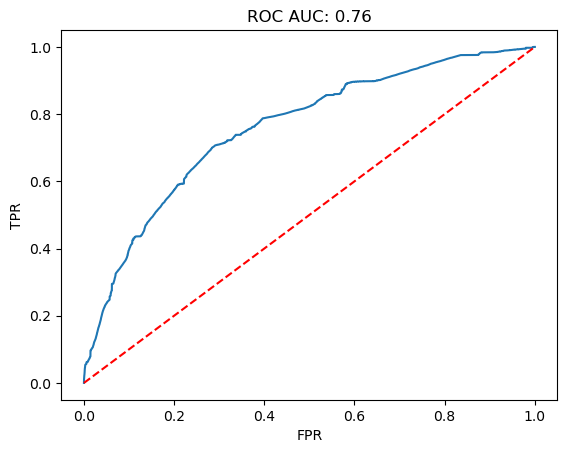

In [39]:
model_performance(ypred_lr_h,ypred_lr_s)

In [40]:
model_scorecard('LOG REG (BASE Model)',ypred_lr_h,ypred_lr_s)

,Accuracy,Recall,Precision,F-1 Score,Cohen Kappa Score,ROC AUC
LOG REG (BASE Model),0.701099,0.719738,0.696392,0.707872,0.402046,0.758465


## Random Forest

In [41]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
ypred_rf_s = model_rf.predict_proba(x_test)[:,1]
ypred_rf_h = model_rf.predict(x_test)

Confusion Matrix
 [[19920  8386]
 [ 6393 22273]]

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.70      0.73     28306
           1       0.73      0.78      0.75     28666

    accuracy                           0.74     56972
   macro avg       0.74      0.74      0.74     56972
weighted avg       0.74      0.74      0.74     56972


Cohen Kappa Score (Reliability): 0.48093353652526993


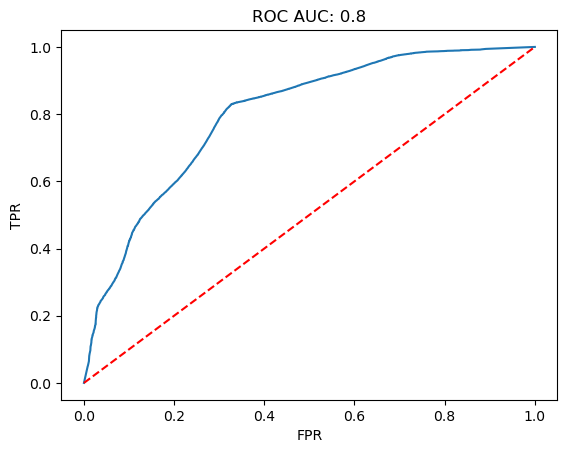

In [43]:
model_performance(ypred_rf_h,ypred_rf_s)

In [44]:
model_scorecard('Random Forest',ypred_rf_h,ypred_rf_s)

,Accuracy,Recall,Precision,F-1 Score,Cohen Kappa Score,ROC AUC
LOG REG (BASE Model),0.701099,0.719738,0.696392,0.707872,0.402046,0.758465
Random Forest,0.740592,0.776983,0.726475,0.750881,0.480934,0.799795


### Decision Tree

In [45]:
model_dt = DecisionTreeClassifier(class_weight='balanced')
model_dt = model_dt.fit(x_train,y_train)

In [46]:
ypred_dt_s = model_dt.predict_proba(x_test)[:,1]
ypred_dt_h = model_dt.predict(x_test)

Confusion Matrix
 [[20340  7966]
 [ 7207 21459]]

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.72      0.73     28306
           1       0.73      0.75      0.74     28666

    accuracy                           0.73     56972
   macro avg       0.73      0.73      0.73     56972
weighted avg       0.73      0.73      0.73     56972


Cohen Kappa Score (Reliability): 0.4672414136195523


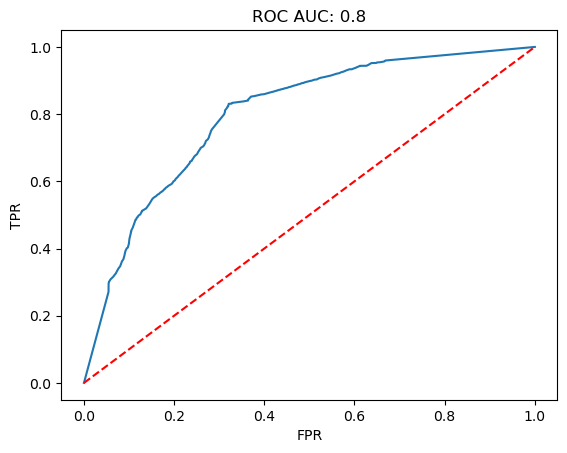

In [47]:
model_performance(ypred_dt_h,ypred_dt_s)

In [48]:
model_scorecard('Decision Tree',ypred_dt_h,ypred_dt_s)

,Accuracy,Recall,Precision,F-1 Score,Cohen Kappa Score,ROC AUC
LOG REG (BASE Model),0.701099,0.719738,0.696392,0.707872,0.402046,0.758465
Random Forest,0.740592,0.776983,0.726475,0.750881,0.480934,0.799795
Decision Tree,0.733676,0.748587,0.729278,0.738806,0.467241,0.798072


### XG-Boost

In [49]:
model_xgb = XGBClassifier(learning_rate = 0.05, max_depth= 9, n_estimators= 100, n_jobs= 100)
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=100, num_parallel_tree=None, ...)

In [50]:
ypred_xgb_s = model_xgb.predict_proba(x_test)[:,1]
ypred_xgb_h = model_xgb.predict(x_test)

Confusion Matrix
 [[20234  8072]
 [ 4409 24257]]

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.71      0.76     28306
           1       0.75      0.85      0.80     28666

    accuracy                           0.78     56972
   macro avg       0.79      0.78      0.78     56972
weighted avg       0.79      0.78      0.78     56972


Cohen Kappa Score (Reliability): 0.5614811213732901


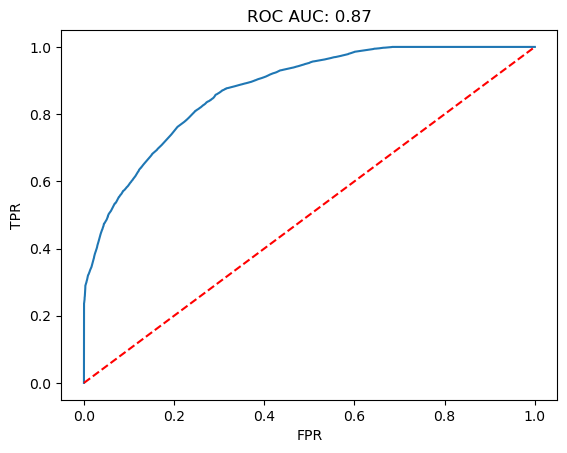

In [51]:
model_performance(ypred_xgb_h,ypred_xgb_s)

In [52]:
model_scorecard('XG-Boost',ypred_xgb_h,ypred_xgb_s)

,Accuracy,Recall,Precision,F-1 Score,Cohen Kappa Score,ROC AUC
LOG REG (BASE Model),0.701099,0.719738,0.696392,0.707872,0.402046,0.758465
Random Forest,0.740592,0.776983,0.726475,0.750881,0.480934,0.799795
Decision Tree,0.733676,0.748587,0.729278,0.738806,0.467241,0.798072
XG-Boost,0.780927,0.846194,0.750317,0.795377,0.561481,0.873266


### Voting Classifier

In [53]:
from sklearn.ensemble import VotingClassifier

In [54]:
model_vote = VotingClassifier(estimators=[('DT',model_dt),('XGB',model_xgb)],voting='soft')

In [55]:
model_vote.fit(x_train,y_train)

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(class_weight='balanced')),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=100,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [56]:
ypred_vt_s = model_vote.predict_proba(x_test)[:,1]
ypred_vt_h = model_vote.predict(x_test)

Confusion Matrix
 [[20006  8300]
 [ 5535 23131]]

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.71      0.74     28306
           1       0.74      0.81      0.77     28666

    accuracy                           0.76     56972
   macro avg       0.76      0.76      0.76     56972
weighted avg       0.76      0.76      0.76     56972


Cohen Kappa Score (Reliability): 0.5140053379430913


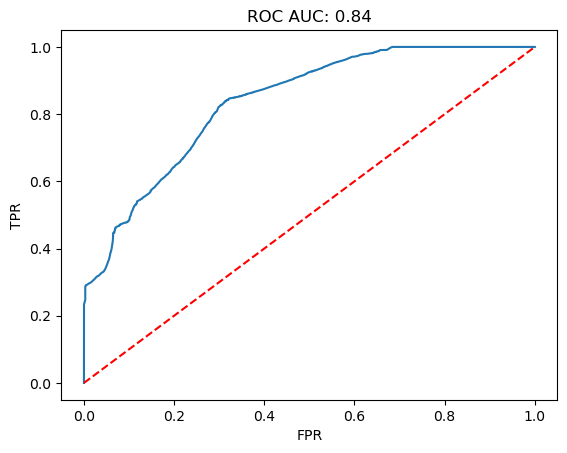

In [57]:
model_performance(ypred_vt_h,ypred_vt_s)

In [58]:
model_scorecard('Voting',ypred_vt_h,ypred_vt_s)

,Accuracy,Recall,Precision,F-1 Score,Cohen Kappa Score,ROC AUC
LOG REG (BASE Model),0.701099,0.719738,0.696392,0.707872,0.402046,0.758465
Random Forest,0.740592,0.776983,0.726475,0.750881,0.480934,0.799795
Decision Tree,0.733676,0.748587,0.729278,0.738806,0.467241,0.798072
XG-Boost,0.780927,0.846194,0.750317,0.795377,0.561481,0.873266
Voting,0.757161,0.806914,0.735929,0.769789,0.514005,0.836526


In [59]:
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,Yes,Medium,No,No,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,Yes,Medium,No,No,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,Yes,Medium,No,No,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,Yes,Medium,No,No,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,Yes,Medium,No,No,No,No


In [60]:
df.nunique()

Gender                      2
Country                    35
Occupation                  5
self_employed               2
family_history              2
treatment                   2
Days_Indoors                5
Growing_Stress              3
Mental_Health_History       3
Mood_Swings                 3
Coping_Struggles            2
Work_Interest               3
mental_health_interview     3
care_options                3
dtype: int64

## Deployment

In [61]:
Gender = 2
Country = 35
Occupation = 5
self_employed = 2
family_history = 2
Days_Indoors = 5
Growing_Stress = 3
Mental_Health_History = 3
Mood_Swings = 3
Coping_Struggles = 2
Work_Interest = 3
mental_health_interview = 3
care_options = 3

In [62]:
input_list = [Gender, Country, Occupation, self_employed, family_history, Days_Indoors, Growing_Stress, Mental_Health_History, 
              Mood_Swings, Coping_Struggles, Work_Interest, mental_health_interview, care_options]

In [63]:
model_xgb.predict_proba([input_list])[:,1]

array([0.9857631], dtype=float32)

In [64]:
# Lets create joblib file
import joblib

In [65]:
with open('final_model.joblib','wb') as file:
    joblib.dump(model_xgb,file)